डेटासेट को विज़ुअलाइज़ करें


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../../data/birds.csv')
birds.head()

Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       79.0       2050.0       4050.0   
3                 LC       57.3       64.0       1066.0       1567.0   
4                 LC       64.0       81.0       1930.0       3310.0   

   MinWingspan  MaxWingspan  
0         76.0         94.0  
1         85.0         93.0  
2        135.0        165.0  
3        113.0        116.0  
4        130.0        165.0

मैक्सबॉडीमास डेटा का एक हिस्टोग्राम दिखाएं


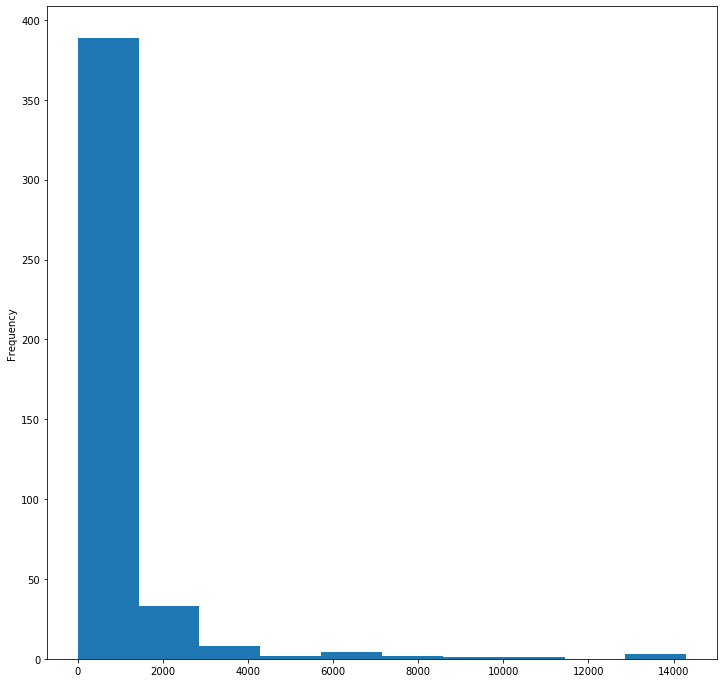

In [4]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 10,figsize = (12,12))
plt.show()

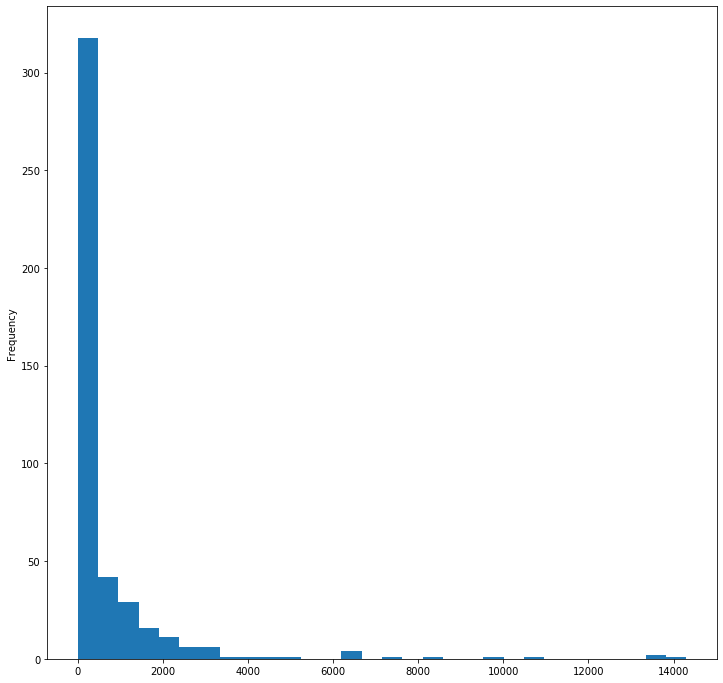

In [5]:
birds['MaxBodyMass'].plot(kind = 'hist',bins = 30,figsize = (12,12))
plt.show()

डेटा को फ़िल्टर करें और एक नया हिस्टोग्राम बनाएं


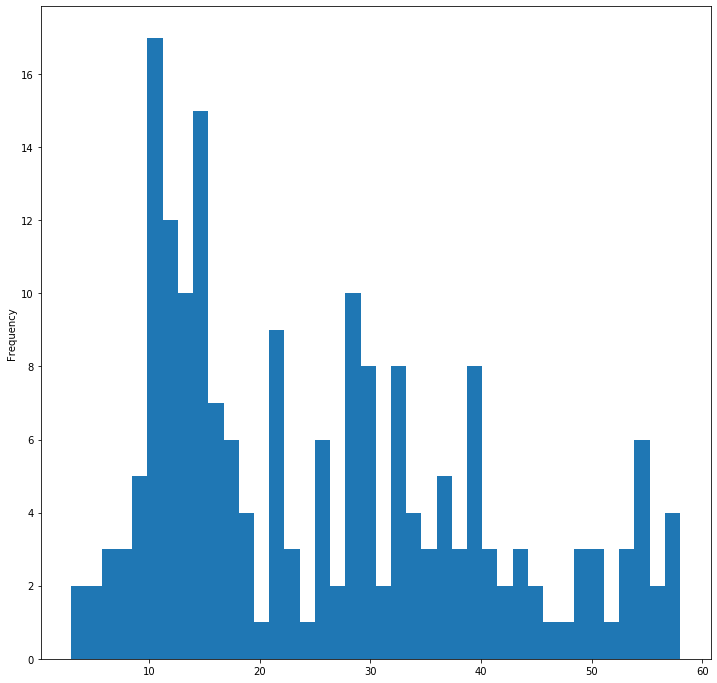

In [6]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()        


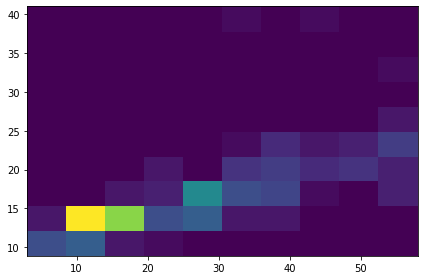

In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

फ़िल्टर किए गए डेटा सेट के साथ काम करते हुए, ConservationStatus और MaxBodyMass को सुपरइम्पोज़ करते हुए एक लेबल और स्टैक्ड हिस्टोग्राम बनाएं।


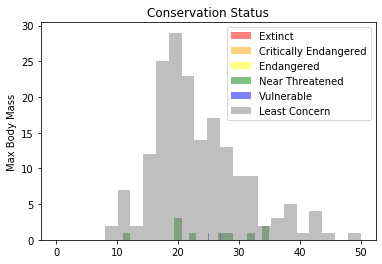

In [8]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Body Mass')
plt.legend();

Seaborn के साथ काम करते हुए, MinWingspan के बारे में एक स्मूथ प्लॉट बनाएं


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


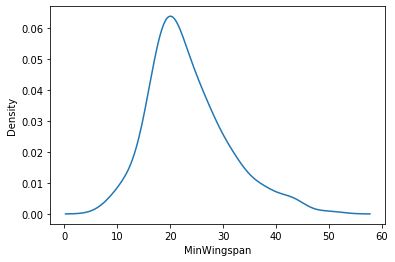

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

MaxBodyMass के बारे में एक kdeplot आज़माएं


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


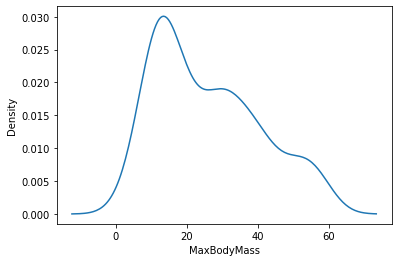

In [11]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

प्लॉट स्मूथिंग पैरामीटर के साथ प्रयोग करें


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


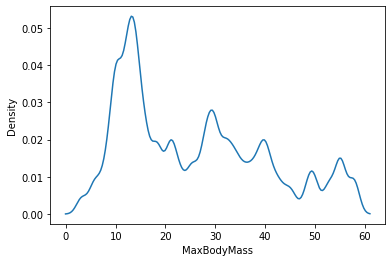

In [12]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

MinLength और MaxLength की तुलना करते हुए ConservationStatus को दिखाने वाले hue के साथ एक 2D kdeplot बनाएं


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


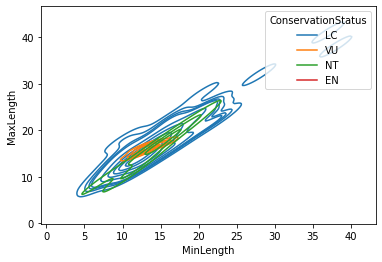

In [13]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")



---

**अस्वीकरण**:  
यह दस्तावेज़ AI अनुवाद सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) का उपयोग करके अनुवादित किया गया है। जबकि हम सटीकता सुनिश्चित करने का प्रयास करते हैं, कृपया ध्यान दें कि स्वचालित अनुवाद में त्रुटियां या अशुद्धियां हो सकती हैं। मूल भाषा में उपलब्ध मूल दस्तावेज़ को प्रामाणिक स्रोत माना जाना चाहिए। महत्वपूर्ण जानकारी के लिए, पेशेवर मानव अनुवाद की सिफारिश की जाती है। इस अनुवाद के उपयोग से उत्पन्न किसी भी गलतफहमी या गलत व्याख्या के लिए हम उत्तरदायी नहीं हैं।
